In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import math as m
%matplotlib inline
from scipy import stats
from scipy import integrate
import pandas as pd
import seaborn as sns

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


<bound method Figure.show of <Figure size 1440x504 with 2 Axes>>

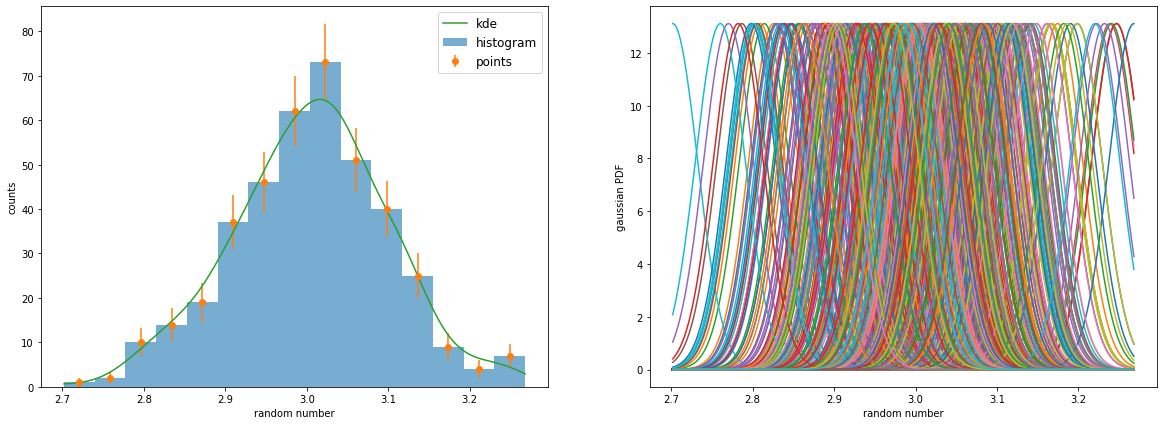

In [2]:
npr.seed(10)

N = 400
mean = 3
std = 0.1

# fill numpy array
x = npr.normal(mean, std, N)

# consider counts as data points with errors
counts, bin_edges = np.histogram(x, bins = 15)
err = np.sqrt(counts)
bin_hw = (bin_edges[1] - bin_edges[0]) / 2      # half width of bins
x_points = bin_edges + bin_hw

# fill histogram
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))
ax[0].hist(x, bins=15, alpha = 0.6, label='histogram')
ax[0].set_xlabel('random number')
ax[0].set_ylabel('counts')

# plot hist as data points with errors
ax[0].errorbar(x_points[:-1], counts, err, label = 'points', fmt = 'o')

# create gaussian for every point of x
std_gaus = 1.06 * x.std() * x.size**(-1/5.)
x_range = np.linspace(np.min(x), np.max(x), N)
gaus = np.array([stats.norm.pdf(x = x_range, loc = x_i, scale = std_gaus) for x_i in x]).T

ax[1].plot(x_range, gaus)
ax[1].set_xlabel('random number')
ax[1].set_ylabel('gaussian PDF')

# kde
sum_gaus = np.sum(gaus, axis = 1)
integr = integrate.trapz(sum_gaus, x_range)
kde = sum_gaus * N * (bin_hw * 2) / integr

ax[0].plot(x_range, kde, label = 'kde')
ax[0].legend(fontsize = 12)
fig.show

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2024-02-09 23:24:01--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2024-02-09 23:24:01--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucc002eee361a588f20fc304d6e0.dl.dropboxusercontent.com/cd/0/inline/CM_kx0S4egR0lJFA4C1Xkej-MvPWuhHjXnKFAuu9jqrazYhX1Hz66QWecvGGK7Ny9yR44SpnvEDUUduRnKoEFJjRW_m3OosLVaQxw208i3Zv9U5DwzreEAwBKpWQ3H-R7Gw/file# [segue]
--2024-02-09 23:24:02--  https://ucc002eee361a588f20fc304d6e0.dl.dropboxusercontent.com/cd/0/inline/CM_kx0S4egR0lJFA4C1Xkej-MvPWuhHjXnKFAuu9jqrazYhX1Hz66QWecvGGK7Ny9y

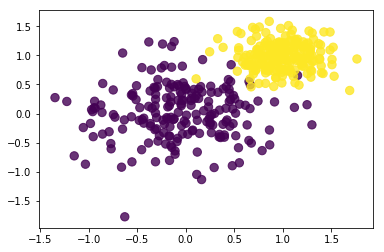

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

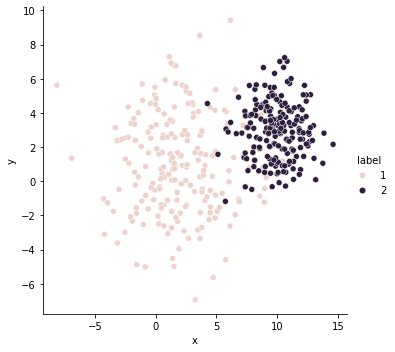

In [4]:
def gauss(mu1, mu2, cov1, cov2):
    N = 200
    
    df1 = pd.DataFrame(np.random.multivariate_normal(mu1, cov1, N), columns=['x', 'y'])
    df1['label'] = np.repeat(1, N)
    df2 = pd.DataFrame(np.random.multivariate_normal(mu2, cov2, N), columns=['x', 'y'])
    df2['label'] = np.repeat(2, N)

    df = pd.concat([df1, df2])

    return df

df = gauss([2, 1], [10, 3], [(10, 0), (0, 10)], [(3, 0), (0, 3)])

sns.relplot(x = 'x', y = 'y', hue = 'label', data = df)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2024-02-09 23:24:04--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy


Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2024-02-09 23:24:05--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc8952ca0e1be844e23e13937e6a.dl.dropboxusercontent.com/cd/0/inline/CM_sTqEyH9E9xkpFKffc_V-E8PNKiV3Cj-blrbWkUbRRxthhxBD4HlgghqhNK5nVRpkK_S1PdBbUhMvXDOiq_cjLdhTxwczN5ap1aaJatB7uZvo34-jKlUyM0dSbVCuexKs/file# [segue]
--2024-02-09 23:24:05--  https://uc8952ca0e1be844e23e13937e6a.dl.dropboxusercontent.com/cd/0/inline/CM_sTqEyH9E9xkpFKffc_V-E8PNKiV3Cj-blrbWkUbRRxthhxBD4HlgghqhNK5nVRpkK_S1PdBbUhMvXDOiq_cjLdhTxwczN5ap1aaJatB7uZvo34-jKlUyM0dSbVCuexKs/file
Risoluzione di uc8952ca0e1be844e23e13937e6a.dl.dropboxus

   residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7 

    residuals  distances
0    1.100000       16.0
1   -1.950000        6.3
8   -0.042857        3.3
9    0.128571        5.3
10   0.085714       15.0


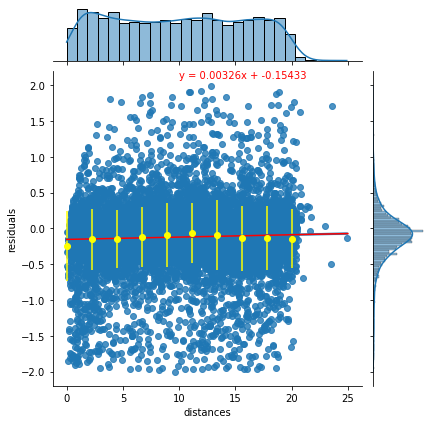

In [10]:
data = np.load('residuals_261.npy', allow_pickle=True)
data = pd.DataFrame(data.item())
print(data.head(), '\n')

# select rows with "residuals" in absolute value less than 2
mask = abs(data['residuals']) < 2
data = data[mask]
print(data.head())

# perform linear regression
lin_reg = stats.linregress(data['distances'], data['residuals'])
m = lin_reg.slope
q = lin_reg.intercept

# linear regression with seaborn
x_lin = np.linspace(0, 25, 100)
y_lin = m * x_lin + q

g = sns.jointplot(data = data, x = data['distances'], y = data['residuals'], kind = 'reg')
g.ax_joint.plot(x_lin, y_lin, '-r')
plt.text(10, 2.1, f'y = {round(m, 5)}x + {round(q, 5)}', color = 'r')

# plot residuals
n_bins = 10

x = np.linspace(0, 20, n_bins)
bin_width = 20 / n_bins
bin_edges = np.arange(0 - bin_width/2, 20 + bin_width/2, bin_width)

y = [np.mean(data['residuals'][(data['distances'] >= bin_edges[i]) & (data['distances'] < bin_edges[i+1])]) for i in range(n_bins)]
erry = [np.std(data['residuals'][(data['distances'] >= bin_edges[i]) & (data['distances'] < bin_edges[i+1])]) for i in range(n_bins)]

plt.errorbar(x, y, erry, fmt = 'o', color = 'yellow')
plt.show()